In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Ielādē apmācību un testa datus
df = pd.read_csv('dati_fin.csv', sep=';')
df_test = pd.read_csv('2024_fin.csv', sep=';')


In [3]:
# Definē cenu kategoriju apzīmējumus un nosacījumus apmācības datiem
kat_nos = ['Ļoti zema', 'Zema', 'Vidēja', 'Augsta', 'Ļoti augsta']
nosac = [
    (df['Darījuma summa, EUR'] >= 1000.00) & (df['Darījuma summa, EUR'] <= 47100.00),
    (df['Darījuma summa, EUR'] > 47100.00) & (df['Darījuma summa, EUR'] <= 92360.00),
    (df['Darījuma summa, EUR'] > 92360.00) & (df['Darījuma summa, EUR'] <= 147000.00), 
    (df['Darījuma summa, EUR'] > 147000.00) & (df['Darījuma summa, EUR'] <= 244580.00),
    (df['Darījuma summa, EUR'] > 244580.00)
]
# Izmanto defināetos nosacījumus, lai piešķirtu cenu kategoriju katram ierakstam
df['Cenu kategorija'] = np.select(nosac, kat_nos, default='Nezināma')

# Definē cenu kategoriju apzīmējumus un nosacījumus apmācības datiem
nosac_test = [
    (df_test['Darījuma summa, EUR'] >= 1000.00) & (df_test['Darījuma summa, EUR'] <= 47100.00),
    (df_test['Darījuma summa, EUR'] > 47100.00) & (df_test['Darījuma summa, EUR'] <= 92360.00),
    (df_test['Darījuma summa, EUR'] > 92360.00) & (df_test['Darījuma summa, EUR'] <= 147000.00), 
    (df_test['Darījuma summa, EUR'] > 147000.00) & (df_test['Darījuma summa, EUR'] <= 244580.00),
    (df_test['Darījuma summa, EUR'] > 244580.00)
]
# Izmanto defināetos nosacījumus, lai piešķirtu cenu kategoriju katram ierakstam
df_test['Cenu kategorija'] = np.select(nosac_test, kat_nos, default='Nezināma')

In [ ]:
x_train = df.drop(columns=['Darījuma summa, EUR', 'Cenu kategorija'])  # No apmācību kopas noņem darījuma summu un cenu kategoriju
y_train = df['Cenu kategorija'] 
x_test = df_test.drop(columns=['Darījuma summa, EUR', 'Cenu kategorija']) # No testa kopas noņem darījuma summu un cenu kategoriju
y_test_actual = df_test['Cenu kategorija']

In [5]:
# Izveido gadījuma meža klasifikācijas modeli
rf_reg = RandomForestClassifier(random_state=42)
# Apmāca šo modeli ar apmācību datiem
rf_reg.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Izmanto apmācīto modeli, lai noteiktu cenu kategoriju testa datiem
y_test_pred = rf_reg.predict(x_test)

In [7]:
# Novērtē modeļa precizitāti uz testa datiem
test_accuracy = accuracy_score(y_test_actual, y_test_pred)
print(f"Ticamība: {test_accuracy}")

print(classification_report(y_test_actual, y_test_pred))

Ticamība: 0.7521618817018333
              precision    recall  f1-score   support

      Augsta       0.70      0.71      0.71       706
      Vidēja       0.68      0.71      0.69       998
        Zema       0.64      0.64      0.64      1402
 Ļoti augsta       0.86      0.45      0.59       175
   Ļoti zema       0.86      0.86      0.86      2501

    accuracy                           0.75      5782
   macro avg       0.75      0.68      0.70      5782
weighted avg       0.75      0.75      0.75      5782



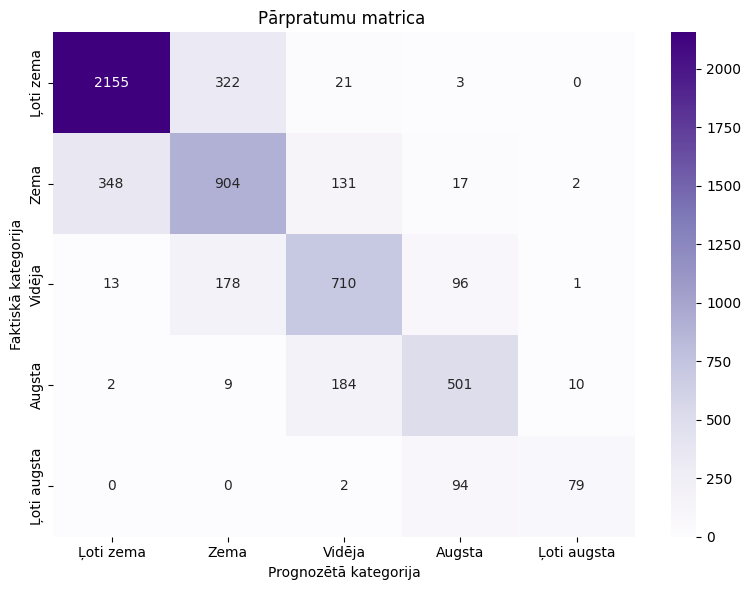

In [8]:
# Izveido pārpratumu matricy
matr = confusion_matrix(y_test_actual, y_test_pred, labels=['Ļoti zema', 'Zema', 'Vidēja', 'Augsta', 'Ļoti augsta'])

# Parāda pārpatumu matricas vizualizāciju
plt.figure(figsize=(8, 6))
sns.heatmap(
    matr,
    annot=True,
    fmt='d',
    cmap='Purples',
    xticklabels=['Ļoti zema', 'Zema', 'Vidēja', 'Augsta', 'Ļoti augsta'],
    yticklabels=['Ļoti zema', 'Zema', 'Vidēja', 'Augsta', 'Ļoti augsta']
)
plt.xlabel('Prognozētā kategorija')
plt.ylabel('Faktiskā kategorija')
plt.title('Pārpratumu matrica ')
plt.tight_layout()
plt.show()
